In [2]:
from sklearn.datasets import load_iris

"""
下载鸢尾花数据
萼片长度、萼片宽度、花瓣长度、花瓣宽度
"""
iris = load_iris()

"""
data对应了样本的4个特征，150行4列
target对应了样本的类别（目标属性），150行1列
iris.target用0、1和2三个整数分别代表了花的三个品种
"""
X = iris.data
y = iris.target

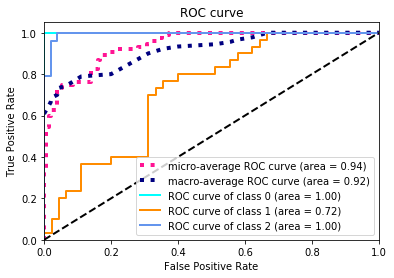

In [119]:
"""
Draw the ROC curve
"""


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

"""
将标签二值化
设置种类
"""
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

"""
训练模型并预测
"""
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

"""
分割训练和测试集
Learn to predict each class against the other
通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

"""
计算每一类的ROC
"""
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

"""
fpr, tpr, thresholds  =  roc_curve(y_test, scores) 
y_test为测试集的结果，score为模型预测的测试集得分
fpr,tpr 分别为假正率、真正率
roc_auc =auc(fpr, tpr)
"""
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

"""
Compute macro-average ROC curve and ROC area
First aggregate all false positive rates
"""
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
"""
interpolate all ROC curves at this points
"""
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
"""
average it and compute AUC
"""
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

"""
Plot all ROC curves
"""
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=2,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

D:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in

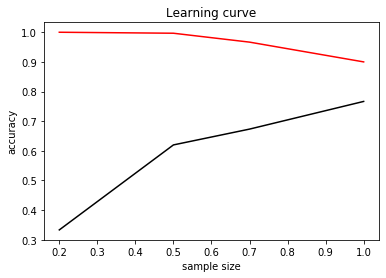

In [125]:
"""
Draw learning curve
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

features = X[:,0:2] 
labels = y
RF = RandomForestClassifier(max_depth = 8, random_state = 0)
size_grid = np.array([0.2,0.5,0.7,1])
train_size,train_scores,validation_scores = learning_curve(RF,features,labels,train_sizes = size_grid, cv = 5)
"""
学习曲线可视化
"""
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'black')
plt.title('Learning curve')
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.show()

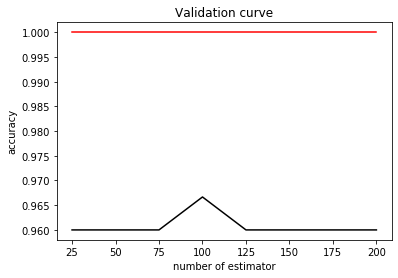

In [124]:
"""
Draw validation curve
"""


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve,learning_curve

features = X
labels = y
 
RF = RandomForestClassifier(max_depth = 8, random_state = 0)
params_grid = np.linspace(25,200,8).astype(int)
 
"""
其他参数不变，观察评估器数量对训练得分的影响
"""
train_scores,validation_scores = validation_curve(RF,features,labels,'n_estimators',params_grid,cv=5)
"""
可视化生成训练、验证曲线
"""
plt.figure()
plt.plot(params_grid, np.average(train_scores,axis = 1),color = 'red')
plt.plot(params_grid,np.average(validation_scores,axis = 1),color = 'black')
plt.title('Validation curve')
plt.xlabel('number of estimator')
plt.ylabel('accuracy')
plt.show()

In [20]:
"""
k-flod
With parameter optimization
"""


from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

"""
选择总数据的30％的数据
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

"""
用KNN算法建模，参数优化，寻找最优模型参数
"""
knn_test = KNeighborsClassifier()
params = {"n_neighbors": [3, 4, 8, 10]}
gridCv = GridSearchCV(knn_test, param_grid=params, cv=5)
gridCv.fit(X_train, y_train)  
print("k-flod交叉验证中最好的结果：", gridCv.best_score_)
print("最好的模型参数是：", gridCv.best_estimator_.n_neighbors)
k_neighbor=gridCv.best_estimator_.n_neighbors

"""
对特征值进行标准化处理
"""
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

"""
建模并进行预测
"""
knn = KNeighborsClassifier(n_neighbors=k_neighbor)  
knn.fit(X_train, y_train)  
y_predict = knn.predict(X_test)

"""
结果展示
"""
labels = ["山鸢尾", "虹膜锦葵", "变色鸢尾"]
tplt = "{0:{3}^10}\t{1:{3}^10}\t{2:^10}"
print(tplt.format("第i次测试","真实值","预测值",chr(12288)))
for i in range(len(y_predict)):
    print(tplt.format((i+1),labels[y_predict[i]],labels[y_test[i]],chr(12288)))
print("准确率为",knn.score(X_test, y_test))

k-flod交叉验证中最好的结果： 0.9619047619047619
最好的模型参数是： 8
　　第i次测试　　　	　　　真实值　　　　	   预测值    
　　　　1　　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　2　　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　3　　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　4　　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　5　　　　　	　　　变色鸢尾　　　	   变色鸢尾   
　　　　6　　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　7　　　　　	　　　变色鸢尾　　　	   变色鸢尾   
　　　　8　　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　9　　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　10　　　　	　　　变色鸢尾　　　	   变色鸢尾   
　　　　11　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　12　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　13　　　　	　　　变色鸢尾　　　	   变色鸢尾   
　　　　14　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　15　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　16　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　17　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　18　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　19　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　20　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　21　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　22　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　23　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　24　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　25　　　　	　　　变色鸢尾　　　	   变色鸢尾   
　　　　26　　　　	　　　虹膜锦葵　　　	   虹膜锦葵   
　　　　27　　　　	　　　山鸢尾　　　　	   山鸢尾    
　　　　28　　　　	　　　山鸢尾　　　　	   山鸢

D:\anacond\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
